<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br/>
<h1>Management Report</h1>
<p>Apprentice Chef Case - Analysis Report</p>

Submitted by <b>Kriti Prakash</b><br/>
Hult International Business School <br/>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<strong>1.1 OVERVIEW<strong>

Apprentice Chef Inc. innovates to support the working professionals with healthy food. Using Machine Learning models, we analyzed the data provided by your team to draw insights on predicting the revenue over first year of each customers life cycle and diversify the revenue stream.

In [1]:
# importing libraries
import pandas as pd # data science essentials
import numpy as np
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model
import random            as rand                     # random number gen
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer 
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying the path and file name
file = './datasets/Apprentice_Chef_Regression.xlsx'


# reading the file into Python
chef = pd.read_excel(file)


<strong>1.2 REGRESSION MODEL ANALYSIS<strong>

In [2]:
#dropping variables to proceed with regression. 
chef_df = chef.drop(['REVENUE', 'log_revenue',
                        'NAME','EMAIL','AVG_PREP_VID_TIME','AVG_TIME_PER_SITE_VISIT',
                        'FIRST_NAME','TOTAL_MEALS_ORDERED','LARGEST_ORDER_SIZE','UNIQUE_MEALS_PURCH',
                        'FAMILY_NAME','email_domain'],
                         axis = 1)


# preparing response variables
chef_target = chef.loc[ : , 'REVENUE']
log_chef_target = chef.loc[ : , 'log_revenue']

# preparing training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            chef_df,
            log_chef_target,
            test_size = 0.25,
            random_state = 219)


In [3]:
# declaring set of x-variables
x_variables = ['CROSS_SELL_SUCCESS','CONTACTS_W_CUSTOMER_SERVICE',
                                'MASTER_CLASSES_ATTENDED',
                                'MEDIAN_MEAL_RATING',
                                'AVG_CLICKS_PER_VISIT',
                                'TOTAL_PHOTOS_VIEWED',
                                'domain_group_company',
                                'domain_group_junk',
                                'domain_group_personal',
                                'log_TOTAL_MEALS_ORDERED',
                                'log_AVG_PREP_VID_TIME',
                                'log_LARGEST_ORDER_SIZE',
                                'log_UNIQUE_MEALS_PURCH',
                                'total_unique_orders',
                                'total_orders_contact_custServ']


In [4]:
# applying model in scikit-learn

# Preparing a DataFrame based the analysis above
ols_data   = chef.loc[ : , x_variables]


# Preparing the target variable
log_chef_target = chef.loc[ : , 'log_revenue']


###############################################
## setting up more than one train-test split ##
###############################################
#splitting the dataset by keeping the test size to 0.25

# FULL x-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_df,     # x-variables
            log_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


<strong>1.2.1 Printing the Score (R-Square) for the best Regression Model - ARD<strong>

In [5]:
# INSTANTIATING Bayesian Automatic Relevance Determination (ARD) model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(3))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(3))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(3)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(3)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(3))
ard_test_gap = abs(ard_train_score - ard_test_score).round(3)

Training Score: 0.753
Testing Score : 0.751
ARD Train-Test Gap : 0.002


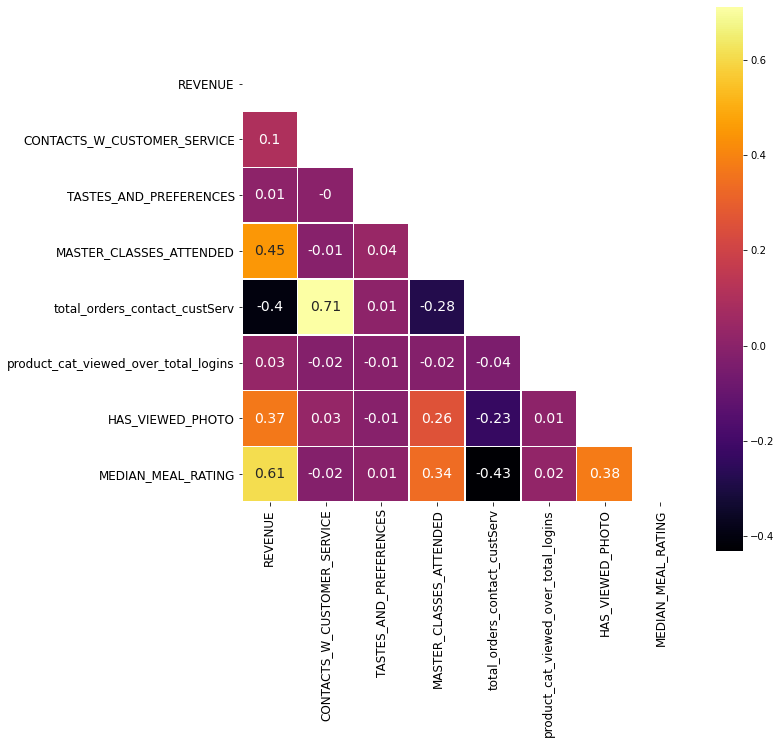

In [6]:
# correlation heatmap
df_corr = chef.corr().round(2)
# setting figure size
fig, ax = plt.subplots(figsize=(10,10))


# limiting the size of the correlation matrix
df_corr2 = df_corr.loc[ ['REVENUE', 'CONTACTS_W_CUSTOMER_SERVICE',
                         'TASTES_AND_PREFERENCES', 'MASTER_CLASSES_ATTENDED', 'total_orders_contact_custServ', 
                         'product_cat_viewed_over_total_logins','HAS_VIEWED_PHOTO','MEDIAN_MEAL_RATING'],
                      ['REVENUE','CONTACTS_W_CUSTOMER_SERVICE',
                         'TASTES_AND_PREFERENCES', 'MASTER_CLASSES_ATTENDED', 'total_orders_contact_custServ', 
                         'product_cat_viewed_over_total_logins','HAS_VIEWED_PHOTO','MEDIAN_MEAL_RATING']]



mask = np.zeros_like(df_corr2)
triangle_indices  = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

# visualizing the correlation matrix
sns.heatmap(df_corr2,
            mask = mask,
            cmap       = 'inferno',     # changing to SPICY colors
            square     = True,          # tightening the layout
            annot      = True,
            annot_kws = {'size' : 14},
                  # lines between boxes
            linewidths = 0.5)          # how thick should the lines be?

#setting the background color


plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)




# saving and displaying the correlation matrix
plt.savefig('Housing Correlation Heatmap.png')
plt.show()

<strong>1.2.2 INSIGHTS AND RECOMMENDATIONS<strong>

    
1. Looking at the correlations, we can see that Master Cooking (Master_Class_Attended) is highly correlated with Revenue(0.45) and basis the analysis we conclude that probability of increasing Revenue is 2.5% by increasing the Master Cooking Class. We recommend increasing the frequency of the Master Cooking Class from quarterly to monthly and in multiple locations to increase the customer engagement ratio. Also, we recommended working on personalizing customer journey for improving the meal rating with is positively related with Revenue (0.61).


2. Secondly, with the negative correlation of customers contacting customer service with Revenue, we recommend revising strategy for Customer Service Team. The customer approaching the Customer Service are not satisfied with the service and we recommend training the team on customer handling which will result in better Customer Satisfaction. 


<strong>1.3 CLASSIFICATION MODEL ANALYSIS<strong>

In [7]:
#########################
# text_split_feature
#########################
#creating a new variable in the dataframe called number of names
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [8]:
text_split_feature(col = 'NAME',
                   df  = chef)

In [9]:
# declaring explanatory variables
chef_data = chef.drop(['NAME','EMAIL','late_deli_over_total_meals','total_orders_without_cancellations',
                        'FIRST_NAME','total_orders_contact_custServ','total_unique_orders','late_over_total',
                        'FAMILY_NAME','email_domain','CROSS_SELL_SUCCESS','total_logins_over_total_meals_ordered',
                      'product_cat_viewed_over_total_logins','log_UNIQUE_MEALS_PURCH','log_LARGEST_ORDER_SIZE',
                      'log_AVG_TIME_PER_SITE_VISIT','log_AVG_PREP_VID_TIME','log_TOTAL_MEALS_ORDERED','log_revenue',
                      'HAS_WEEKLY_PLAN','HAS_VIEWED_PHOTO'],
                         axis = 1)

# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

In [10]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)

In [11]:
# creating a dictionary to store candidate models

candidate_dict = {

    #all variables (set)
 'logit_full'    : ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 
 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER','AVG_PREP_VID_TIME', 
 'LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED','MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED', 
 'domain_group_company','domain_group_junk','domain_group_personal', 'number_of_names'],
    
 # significant variables only (set 1)
 'logit_sig'    : ['REVENUE','CONTACTS_W_CUSTOMER_SERVICE',   
                                     'MOBILE_NUMBER',
                                     'CANCELLATIONS_BEFORE_NOON',  
                                     'TASTES_AND_PREFERENCES',
                                     'PC_LOGINS',
                                     'EARLY_DELIVERIES',  
                                     'REFRIGERATED_LOCKER',  
                                     'MASTER_CLASSES_ATTENDED', 
                                     'MEDIAN_MEAL_RATING',
                                     'domain_group_company', 
                                     'domain_group_junk',
                                     'number_of_names']
  
}

In [12]:
#Random Forest Model
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [13]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [14]:
# train/test split with the logit_sig variables (set 1)
chef_df   =  chef.loc[ : , candidate_dict['logit_full']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            chef_df,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)

<strong>1.3.1 Printing AUC score for the Best Classification Model - Tuned Random Forest<strong>

In [15]:
#Tuned Random Forest
# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=7,
                       min_samples_leaf=3, n_estimators=850, random_state=219,
                       warm_start=True)

# FITTING the model object
forest_tuned_fit = forest_tuned.fit(chef_df, chef_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(3))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(3))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                   y_score = forest_tuned_pred).round(3))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(3) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(3)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(3) # auc

Forest Tuned Training ACCURACY: 0.831
Forest Tuned Testing  ACCURACY: 0.834
Forest Tuned AUC Score        : 0.751


In [16]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 81
False Positives: 75
False Negatives: 6
True Positives : 325



<ipython-input-13-141a9830ad1b>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


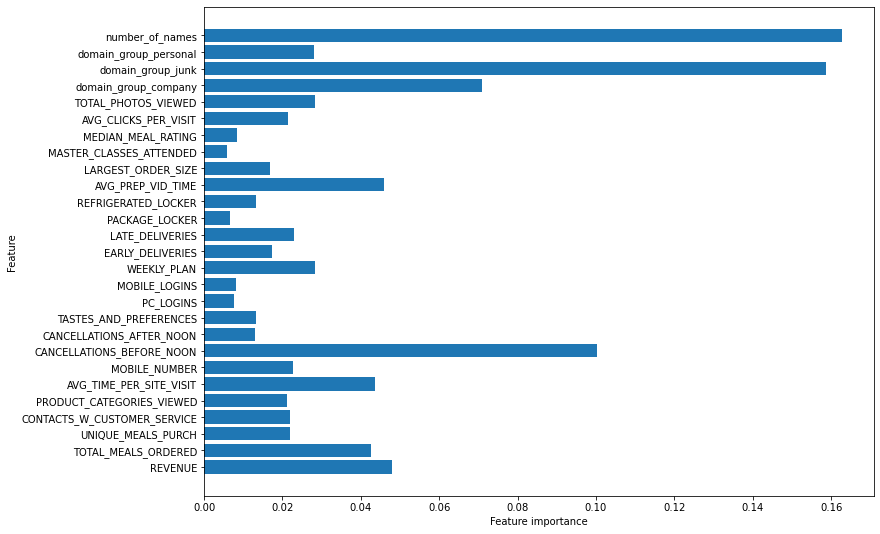

In [17]:
#plotting the important features/variables
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

<strong>1.3.2 INSIGHTS AND RECOMMENDATIONS<strong>

1. For Cross Selling one of the most important variable/feature is the Junk Email domain(as shown in graph above). We recommend including and analyzing the junk email domain in formulating strategy for widening the audience for cross-selling promotion. 


2. We recommend creating more content on the website to make the website more interactive increasing the average time per visit which is an important variable contributing to cross-sell promotion to diversify revenue stream.  


<strong>1.4 CONCLUSION<strong>

75% change in revenue can be explained by the Regression model. Classification model is 83% accurate in predicting the number of people where cross selling was successful and where not. 


We recommend collecting data on Gender and Age to help in better classification and accuracy for cross selling techniques and revenue. 